## Read .npy and visualize 
(use it with python3 and matplotlib)

In [96]:
# %matplotlib
# %matplotlib notebook 
# %matplotlib inline

## import statements 
import numpy as np 
import os 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from colour import Color
from sklearn.neighbors import KernelDensity


In [78]:
## Inputs
log_name = "log_airplane_se_skip"
dir_path = os.getcwd()
LOG_DIR = os.path.join(os.path.dirname(dir_path), "logs", log_name)
PRED_DIR = os.path.join(LOG_DIR, "preds.npy")

if not os.path.exists(PRED_DIR):
    print("Run test.py first!")
    # ! python test.py --model model_se_skip --model_path logs/log_airplane_se_skip/model.ckpt --category Airplane
    

In [44]:
## Read data
data = np.load(PRED_DIR) 


In [ ]:
## Save the first point cloud as obj file 
data1 = data[0,:,:]
out_path_temp = os.path.join(os.path.dirname(PRED_DIR), "one_out_temp.txt")
out_path = os.path.join(os.path.dirname(PRED_DIR), "one_out.obj")

np.savetxt(out_path_temp, data1, delimiter=" ")

f = open(out_path_temp, "r")
f_out = open(out_path, "w")
lines = f.readlines()

for line in lines: 
    f_out.write("v " + line)

f.close()
f_out.close()

os.remove(out_path_temp)
print("Obj file is created at ", out_path)


In [45]:
## Slice the data
all_0 = data[:,0,:]
all_1 = data[:,1,:]


In [81]:
## Find most front vertex
num_of_models = data.shape[0]
# Create arrays to keep the info for all the models 
max_z_ind_arr = np.empty((num_of_models,1), dtype="int32") # right
min_z_ind_arr = np.empty((num_of_models,1), dtype="int32") # left
max_y_ind_arr = np.empty((num_of_models,1), dtype="int32") # bottom
min_y_ind_arr = np.empty((num_of_models,1), dtype="int32") # top
max_x_ind_arr = np.empty((num_of_models,1), dtype="int32") # front 
min_x_ind_arr = np.empty((num_of_models,1), dtype="int32") # back

for i in range(num_of_models):
    id = i
    max_z_ind_arr[i] = np.argmax(data[id, :, 2]) # right
    min_z_ind_arr[i] = np.argmin(data[id, :, 2]) # left
    max_y_ind_arr[i] = np.argmax(data[id, :, 1]) # bottom
    min_y_ind_arr[i] = np.argmin(data[id, :, 1]) # top
    max_x_ind_arr[i] = np.argmax(data[id, :, 0]) # front 
    min_x_ind_arr[i] = np.argmin(data[id, :, 0]) # back

# Choose the max values 
max_z_ind = np.max(max_z_ind_arr) # right
print("Max z ind: ", max_z_ind)
min_z_ind = np.max(min_z_ind_arr) # left
print("Min z ind: ", min_z_ind)
max_y_ind = np.max(max_y_ind_arr) # bottom
print("Max y ind: ", max_y_ind)
min_y_ind = np.max(min_y_ind_arr) # top
print("Min y ind: ", min_y_ind)
max_x_ind = np.max(max_x_ind_arr) # front 
print("Max x ind: ", max_x_ind)
min_x_ind = np.max(min_x_ind_arr) # back
print("Min x ind: ", min_x_ind)

# Add to dictionary
max_values = {}
max_values["front"] = max_x_ind
max_values["back"] = min_x_ind
max_values["right"] = max_z_ind
max_values["left"] = min_z_ind
max_values["top"] = min_y_ind
max_values["bottom"] = max_y_ind

Max z ind:  2031
Min z ind:  1894
Max y ind:  1924
Min y ind:  1968
Max x ind:  1937
Min x ind:  2037


## Plots 

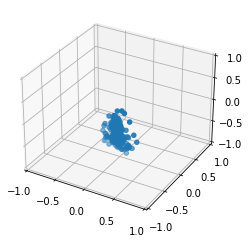

In [46]:
## Plot some intermediate 
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.scatter3D(all_0[:,0], all_0[:,1], all_0[:,2])

## Show figure - Update
plt.show()



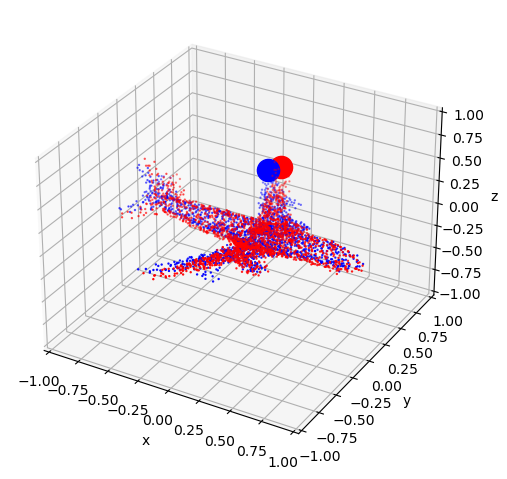

In [82]:
## Plot shapes 
fig2 = plt.figure(dpi=100)
ax = plt.axes(projection='3d')

fig2.set_size_inches(6,6)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

id = 6
# ax.scatter3D(data[id,:,0], data[id,:,1], data[id,:,2], s=0.5, c="blue")
ax.scatter3D(data[id,:,0], data[id,:,2], data[id,:,1], s=0.5, c="blue") # rotated

## Plot second one on top
id2 = 5
ax.scatter3D(data[id2,:,0], data[id2,:,2], data[id2,:,1], s=0.5, c="red") # rotated

## Plot a choosen point idx for both
point_name = "right"
point = max_values[point_name]

ax.scatter3D(data[id,point,0], data[id,point,2], data[id,point,1], s=255, c="blue") # rotated
ax.scatter3D(data[id2,point,0], data[id2,point,2], data[id2,point,1], s=255, c="red") # rotated

plt.show()
# fig

In [84]:
## Save figure 
fig_name_2 = "mesh_" + str(id) + "_mesh_" + str(id2) + "_" + point_name + ".png"
fig2.savefig(os.path.join(LOG_DIR, fig_name_2), dpi=800)


### Compare two point clouds next to each other 

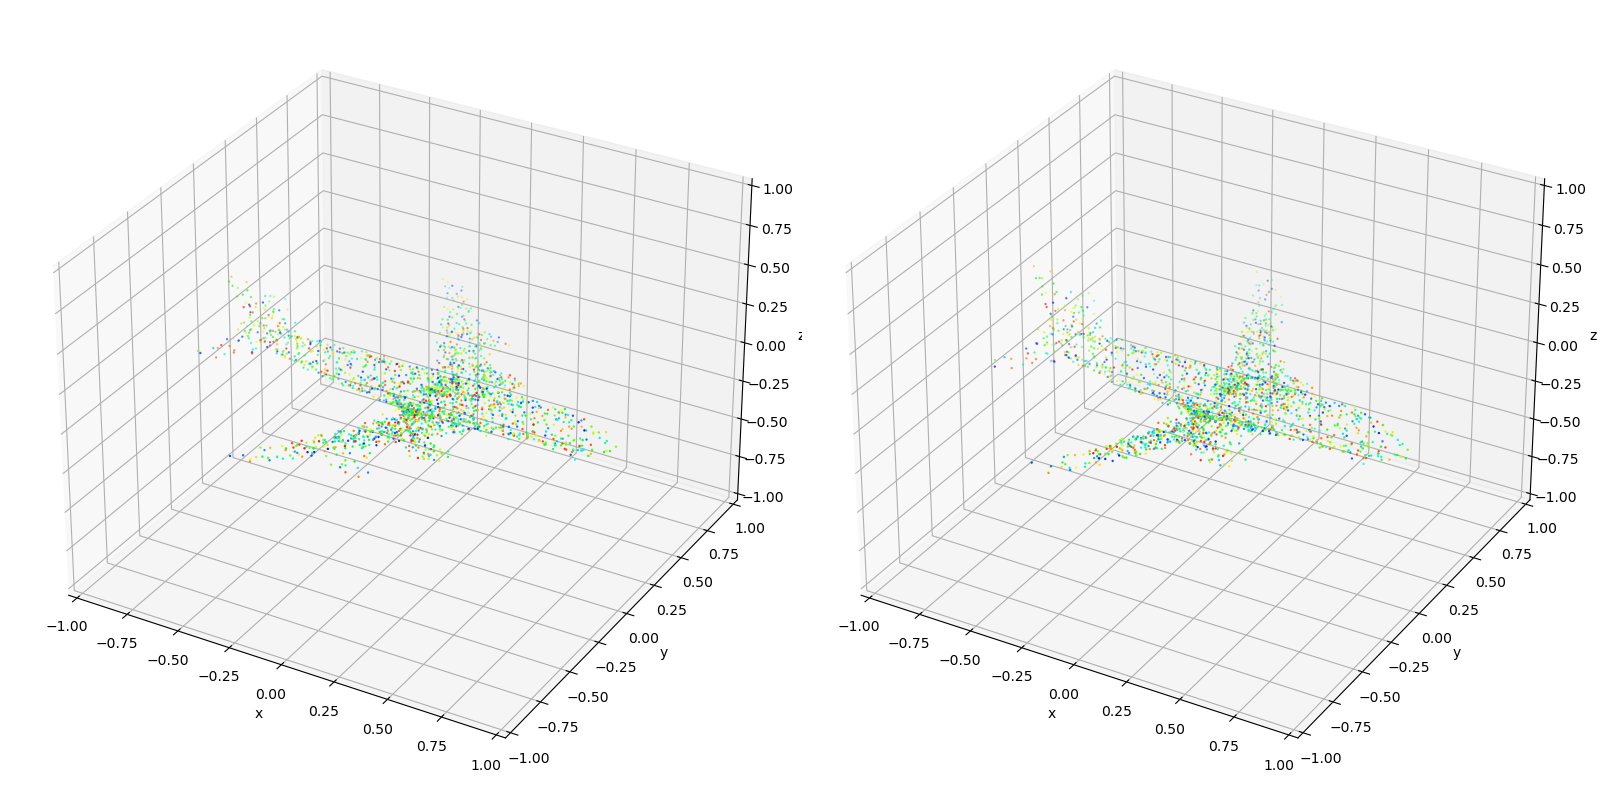

In [90]:
## Plot the point clouds in a gradient-like colors next to each other 
fig_color = plt.figure(dpi=100)
fig_color.set_size_inches(16,12)
fig_color.tight_layout()

# Create color list that is the gradient from red to blue 
red = Color("red")
colors = list(red.range_to(Color("blue"), data.shape[1]))
colors_rgb = [colors[i].rgb for i in range(len(colors))]
colors_rgb_arr = np.array(colors_rgb, dtype='float32')

# Plot first one 
ax3 = fig_color.add_subplot(1, 2, 1, projection='3d')
ax3.set_title("")
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("z")
ax3.set_xlim(-1, 1)
ax3.set_ylim(-1, 1)
ax3.set_zlim(-1, 1)
ax3.scatter3D(data[id,:,0], data[id,:,2], data[id,:,1], s=0.5, c=colors_rgb_arr) # rotated
# Plot second one 
ax4 = fig_color.add_subplot(1, 2, 2, projection='3d')
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_zlabel("z")
ax4.set_xlim(-1, 1)
ax4.set_ylim(-1, 1)
ax4.set_zlim(-1, 1)
ax4.scatter3D(data[id2,:,0], data[id2,:,2], data[id2,:,1], s=0.5, c=colors_rgb_arr) # rotated

fig_color.tight_layout()
plt.show()



In [91]:
## Save figure 
fig_name_color = "mesh_" + str(id) + "_mesh_" + str(id2) + "_comparison" + ".png"
fig_color.savefig(os.path.join(LOG_DIR, fig_name_color), dpi=800)


## Look at the point distributions 

In [98]:
## Analyze point 
point_name = "back"
point_data = max_values[point_name]
x_axis = np.arange(data.shape[0])

x_data_curr = data[:, point_data, 0]
y_data_curr = data[:, point_data, 1]
z_data_curr = data[:, point_data, 2]

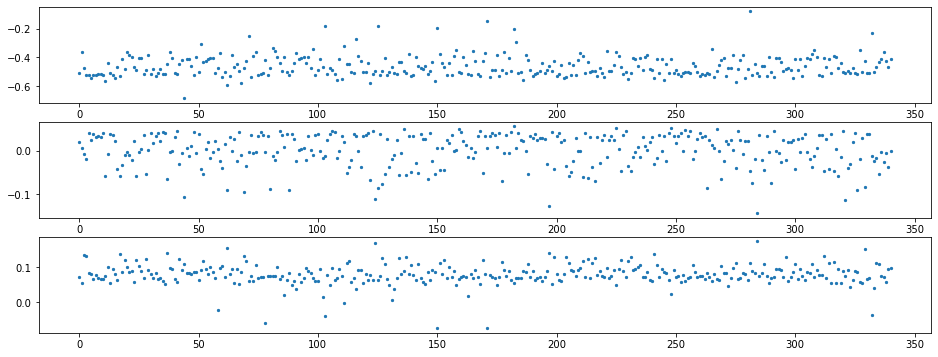

In [99]:
## Plot figure
fig_2d = plt.figure()
fig_2d.set_size_inches(16,6)

# x
ax1 = plt.subplot(3,1,1)
ax1.scatter(x_axis, x_data_curr, s=5)
# y 
ax2 = plt.subplot(3,1,2)
ax2.scatter(x_axis, y_data_curr, s=5)
# z 
ax3 = plt.subplot(3,1,3)
ax3.scatter(x_axis, z_data_curr, s=5)

plt.show()


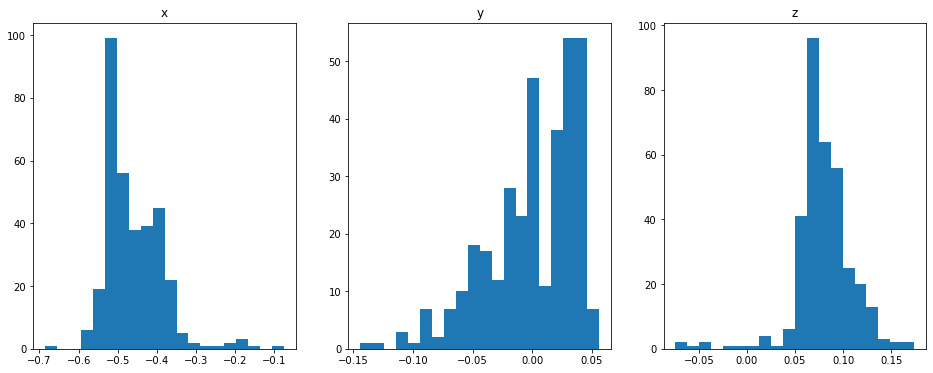

In [100]:
## Plot histogram
fig_hist = plt.figure()
fig_hist.set_size_inches(16,6)
data_space = 20

# x
ax1 = plt.subplot(1,3,1)
ax1.set_title("x")
ax1 = plt.hist(x_data_curr, data_space)
# y 
ax2 = plt.subplot(1,3,2)
ax2.set_title("y")
ax2 = plt.hist(y_data_curr, data_space)
# z 
ax3 = plt.subplot(1,3,3)
ax3.set_title("z")
ax3 = plt.hist(z_data_curr, data_space)

plt.show()


(61,)
(20,)
(25,)


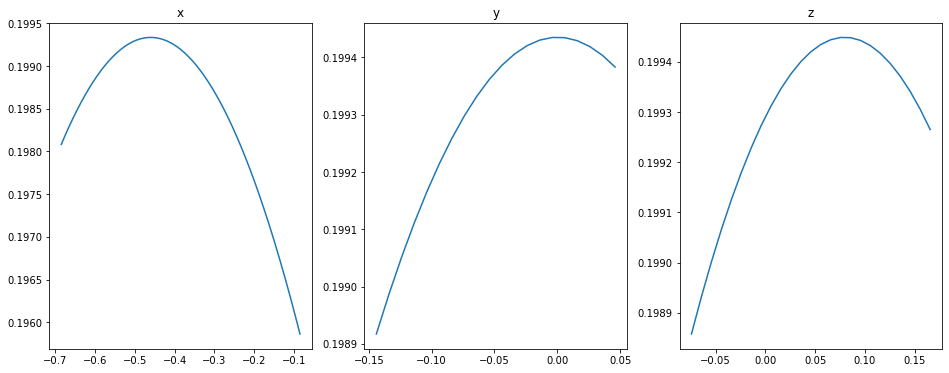

In [101]:
## Fit to a PDF
fig_pdf = plt.figure()
fig_pdf.set_size_inches(16,6)
data_space_pdf = 0.01

## X
# fit density
model_x = KernelDensity(bandwidth=2, kernel='gaussian')
x_data_curr = x_data_curr.reshape((len(x_data_curr), 1))
model_x.fit(x_data_curr)
# Create x axis data for PDF
x_pdf_x = np.arange(np.min(x_data_curr), np.max(x_data_curr), data_space_pdf)
print(x_pdf_x.shape)
x_pdf_x = np.reshape(x_pdf_x, (x_pdf_x.shape[0], 1))
# Get probabilities
probabilities_x = model_x.score_samples(x_pdf_x)
probabilities_x = np.exp(probabilities_x)
# Visualize 
ax1 = plt.subplot(1,3,1)
ax1.set_title("x")
plt.plot(x_pdf_x[:], probabilities_x)

## Y
# fit density
model_y = KernelDensity(bandwidth=2, kernel='gaussian')
y_data_curr = y_data_curr.reshape((len(y_data_curr), 1))
model_y.fit(y_data_curr)
# Create x axis data for PDF
x_pdf_y = np.arange(np.min(y_data_curr), np.max(y_data_curr), data_space_pdf)
print(x_pdf_y.shape)
x_pdf_y = np.reshape(x_pdf_y, (x_pdf_y.shape[0], 1))
# Get probabilities
probabilities_y = model_y.score_samples(x_pdf_y)
probabilities_y = np.exp(probabilities_y)
# Visualize 
ax2 = plt.subplot(1,3,2)
ax2.set_title("y")
plt.plot(x_pdf_y[:], probabilities_y)

## Z
# fit density
model_z = KernelDensity(bandwidth=2, kernel='gaussian')
z_data_curr = z_data_curr.reshape((len(z_data_curr), 1))
model_z.fit(z_data_curr)
# Create x axis data for PDF
x_pdf_z = np.arange(np.min(z_data_curr), np.max(z_data_curr), data_space_pdf)
print(x_pdf_z.shape)
x_pdf_z = np.reshape(x_pdf_z, (x_pdf_z.shape[0], 1))
# Get probabilities
probabilities_z = model_z.score_samples(x_pdf_z)
probabilities_z = np.exp(probabilities_z)
# Visualize 
ax3 = plt.subplot(1,3,3)
ax3.set_title("z")
plt.plot(x_pdf_z[:], probabilities_z)


plt.show()

In [ ]:
## Big ones 
big_1 = np.where(data[:,671,0] > 1)
big_1[0].shape
